Author: **Twisha Shah** <br>
Prof: **Mahdi-Roozbahani** <br>
Course: **CS7641 (Fall 2024)**

In [28]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.io import arff
from sklearn.cluster import DBSCAN
import time

In [29]:
# # Generate sample data
# # Case:1
# # X, y = make_blobs(n_samples=10, centers=2, cluster_std=0.5, random_state=32)
# # Case:2
# # X, y = make_blobs(n_samples=15, centers=3, cluster_std=0.7, random_state=42)
# #Case:3


# # Plot the data
# plt.scatter(X[:, 0], X[:, 1], c=y)
# plt.title("Dataset")
# plt.show()

In [30]:
def printClusterInformation(labels):
    """
    Prints the number of clusters (excluding noise) and the number of points in each cluster.

    Parameters:
    - labels: array-like, cluster labels for each data point (with -1 representing noise)
    """
    labels = np.array(labels)  # Ensure labels are in a NumPy array
    num_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Exclude noise from cluster count

    print(f'Number of clusters (excluding noise): {num_clusters}')

    unique_labels = np.unique(labels)
    for label in unique_labels:
        if label != -1:  # Ignore noise
            count = np.sum(labels == label)
            print(f"Cluster {label}: {count} points")
        else:
            print(f"Noise: {np.sum(labels == label)} points")


In [31]:
def plotClusters(X, dbscan_labels, square_dbscan_labels):
    """
    Plots two clustering results side by side.

    Parameters:
    - X: array-like, shape (n_samples, n_features), the data points
    - dbscan_labels: array-like, cluster dbscan_labels for each data point (with -1 representing noise)
    - square_dbscan_labels: array-like, alternative cluster dbscan_labels for each data point (with -1 representing noise)
    """
    # Define distinct colors
    distinct_colors = [
        '#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231',
        '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe',
        '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000',
        '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080'
    ]

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Plot using distinct colors
    unique_labels = np.unique(dbscan_labels)

    for i, label in enumerate(unique_labels):
        cluster_points = X[dbscan_labels == label]
        ax1.scatter(cluster_points[:, 0], cluster_points[:, 1],
                    c=[distinct_colors[i % len(distinct_colors)]],  # Cycle through colors
                    marker='o', edgecolor='k', s=100, label=f'Cluster {label}' if label != -1 else 'Noise')

    ax1.set_title('Clustering with SKLEARN DBSCAN')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    ax1.grid()

    # Plot using Spectral colormap
    ax2.set_title('DBSCAN Clustering using Square Boundary')
    unique_labels = set(square_dbscan_labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

    for k, col in zip(unique_labels, colors):
        if k == -1:  # Noise
            col = 'k'  # Black for noise
            label = 'Noise'
        else:
            label = f'Cluster {k}'

        class_member_mask = (np.array(square_dbscan_labels) == k)
        xy = X[class_member_mask]
        ax2.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=10, label=label)

    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    ax2.grid()

    plt.tight_layout()
    plt.show()


**DBSCAN - Boundary Box Neighbourhood Search**

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

def dbscan(DB, x_range, y_range, min_pts):
    C = -1  # Cluster counter
    labels = [None] * len(DB)  # To store cluster labels
    noise = -1  # Noise label

    def get_neighbors(DB, point_index, x_range, y_range):
        center_point = DB[point_index]
        xmin, xmax = x_range
        ymin, ymax = y_range

        # Bounding box around the center point
        box_min = np.array([center_point[0] + xmin, center_point[1] + ymin])
        box_max = np.array([center_point[0] + xmax, center_point[1] + ymax])

        # Check for points within the bounding box
        in_box = np.all((DB >= box_min) & (DB <= box_max), axis=1)
        return np.where(in_box)[0]

    for i, P in enumerate(DB):
        if labels[i] is not None:  # Previously processed
            continue

        neighbors = get_neighbors(DB, i, x_range, y_range)  # Find neighbors using square boundary

        if len(neighbors) < min_pts:  # Density check
            labels[i] = noise  # Label as Noise
            continue

        C += 1  # Next cluster label
        labels[i] = C  # Label initial point

        seed_set = set(neighbors) - {i}  # Neighbors to expand

        while seed_set:
            Q = seed_set.pop()

            if labels[Q] == noise:
                labels[Q] = C  # Change Noise to border point

            if labels[Q] is not None:  # Previously processed
                continue

            labels[Q] = C  # Label neighbor

            new_neighbors = get_neighbors(DB, Q, x_range, y_range)  # Find neighbors using square boundary

            if len(new_neighbors) >= min_pts:  # Density check
                seed_set.update(new_neighbors)

    return labels



------------------------
Original DBSCAN
Time taken to run Original DBSCAN: 0.0032 seconds
Number of clusters (excluding noise): 4
Noise: 17 points
Cluster 0: 4 points
Cluster 1: 61 points
Cluster 2: 57 points
Cluster 3: 61 points

------------------------
Boundary Neighbourhood DBSCAN
Time taken to run Boundary DBSCAN: 0.0048 seconds
Number of clusters (excluding noise): 3
Noise: 11 points
Cluster 0: 63 points
Cluster 1: 61 points
Cluster 2: 65 points


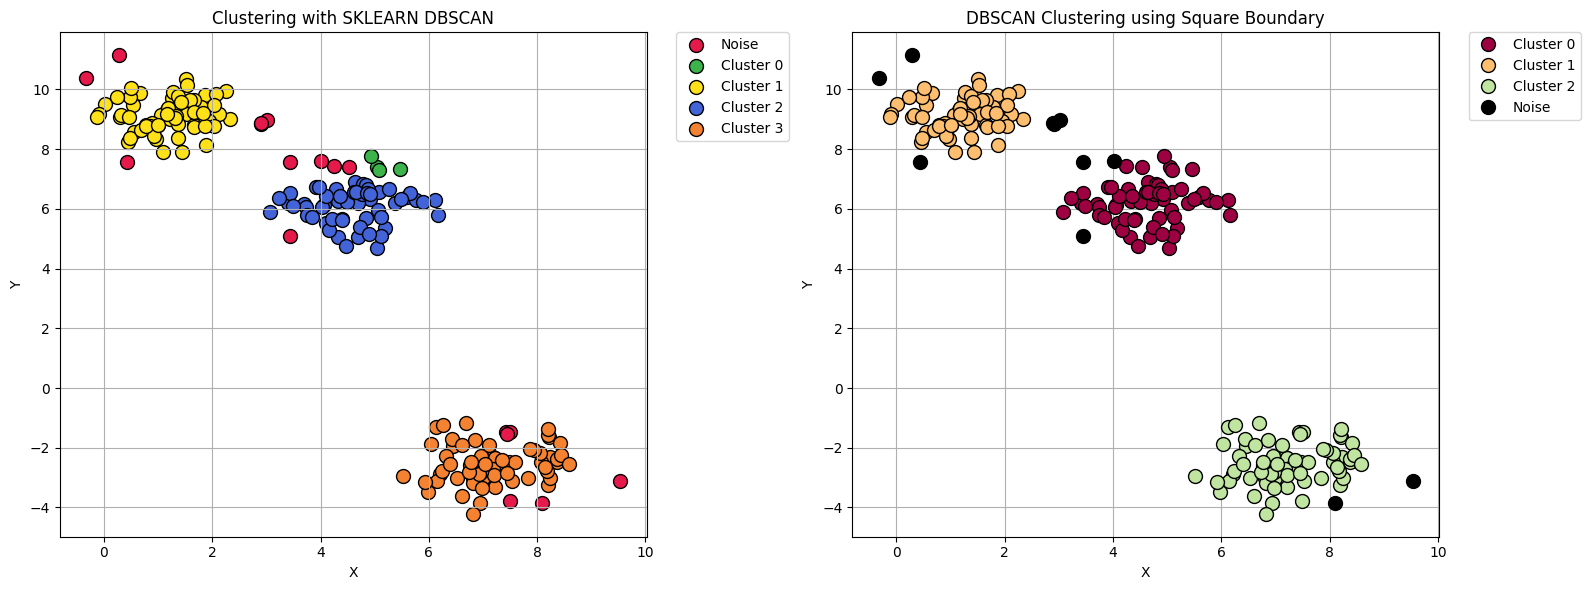

In [33]:
# Data:
X, y = make_blobs(n_samples=200, centers=3, cluster_std=0.7, random_state=32)

#Sklearn - Original DBSCAN
start_time = time.time()
origDbscan = DBSCAN(eps=0.5, min_samples=4)
labels = origDbscan.fit_predict(X)
end_time = time.time()
print("------------------------")
print("Original DBSCAN")
print(f"Time taken to run Original DBSCAN: {end_time - start_time:.4f} seconds")
printClusterInformation(labels)

print()
# Boundary DBSCAN
x_range = (-0.5, 0.5)  # Horizontal boundary range (xmin, xmax)
y_range = (-0.5, 0.5)  # Vertical boundary range (ymin, ymax)
min_pts = 4
start_time = time.time()
cluster_labels = dbscan(X, x_range, y_range, min_pts)
end_time = time.time()
print("------------------------")
print("Boundary Neighbourhood DBSCAN")
print(f"Time taken to run Boundary DBSCAN: {end_time - start_time:.4f} seconds")
printClusterInformation(cluster_labels)

plotClusters(X, labels, cluster_labels)


------------------------
Original DBSCAN
Time taken to run Original DBSCAN: 0.0037 seconds
Number of clusters (excluding noise): 2
Cluster 0: 200 points
Cluster 1: 99 points

------------------------
Boundary Neighbourhood DBSCAN
Time taken to run Boundary DBSCAN: 0.0101 seconds
Number of clusters (excluding noise): 2
Cluster 0: 200 points
Cluster 1: 99 points


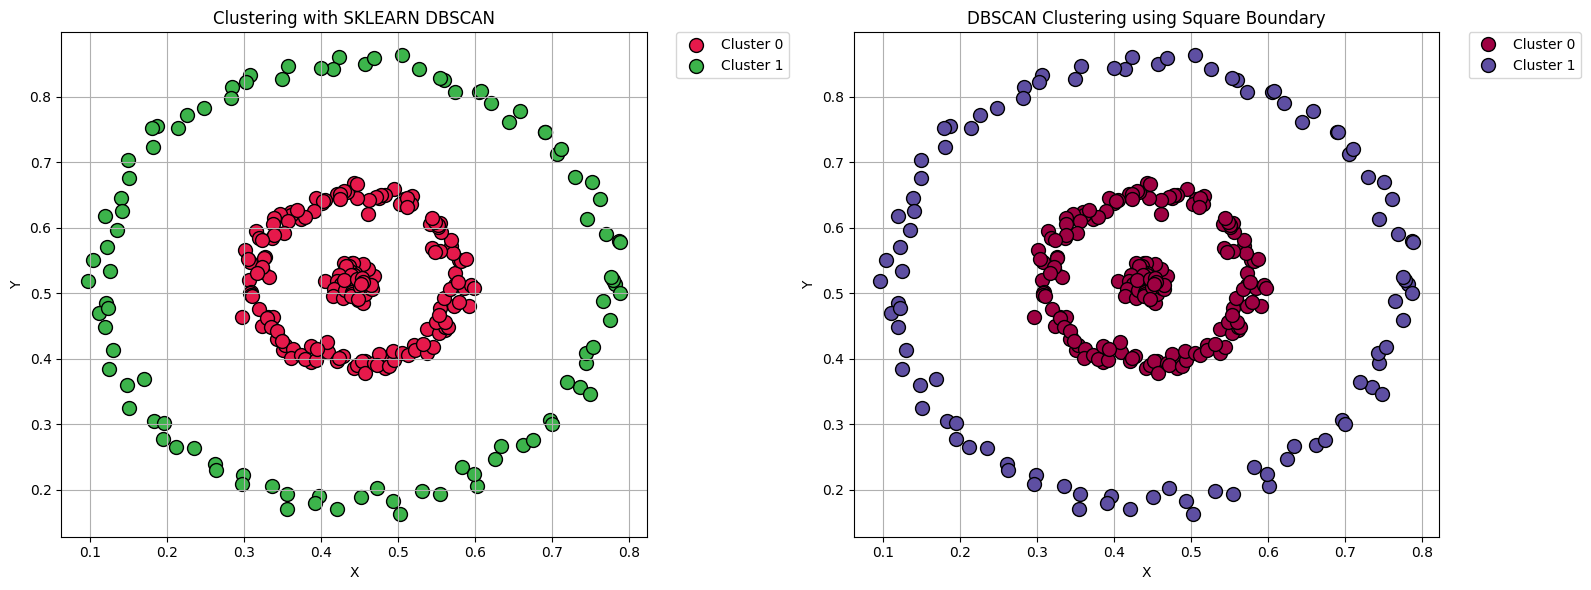

In [34]:
#Data:
arff_file = arff.loadarff('zelnik1.arff')
df = pd.DataFrame(arff_file[0])
X = df.loc[:, ["x", "y"]]
X.head()
X = X.to_numpy()

#Sklearn - Original DBSCAN
start_time = time.time()
origDbscan = DBSCAN(eps=0.1, min_samples=4)
labels = origDbscan.fit_predict(X)
end_time = time.time()
print("------------------------")
print("Original DBSCAN")
print(f"Time taken to run Original DBSCAN: {end_time - start_time:.4f} seconds")
printClusterInformation(labels)

print()
# Boundary DBSCAN
x_range = (-0.1, 0.1)  # Horizontal boundary range (xmin, xmax)
y_range = (-0.1, 0.1)  # Vertical boundary range (ymin, ymax)
min_pts = 4
start_time = time.time()
cluster_labels = dbscan(X, x_range, y_range, min_pts)
end_time = time.time()
print("------------------------")
print("Boundary Neighbourhood DBSCAN")
print(f"Time taken to run Boundary DBSCAN: {end_time - start_time:.4f} seconds")
printClusterInformation(cluster_labels)

plotClusters(X, labels, cluster_labels)


------------------------
Original DBSCAN
Time taken to run Original DBSCAN: 0.0072 seconds
Number of clusters (excluding noise): 10
Noise: 58 points
Cluster 0: 8 points
Cluster 1: 6 points
Cluster 2: 6 points
Cluster 3: 12 points
Cluster 4: 8 points
Cluster 5: 4 points
Cluster 6: 11 points
Cluster 7: 6 points
Cluster 8: 90 points
Cluster 9: 91 points

------------------------
Boundary Neighbourhood DBSCAN
Time taken to run Boundary DBSCAN: 0.0106 seconds
Number of clusters (excluding noise): 7
Noise: 34 points
Cluster 0: 8 points
Cluster 1: 8 points
Cluster 2: 26 points
Cluster 3: 12 points
Cluster 4: 201 points
Cluster 5: 6 points
Cluster 6: 5 points


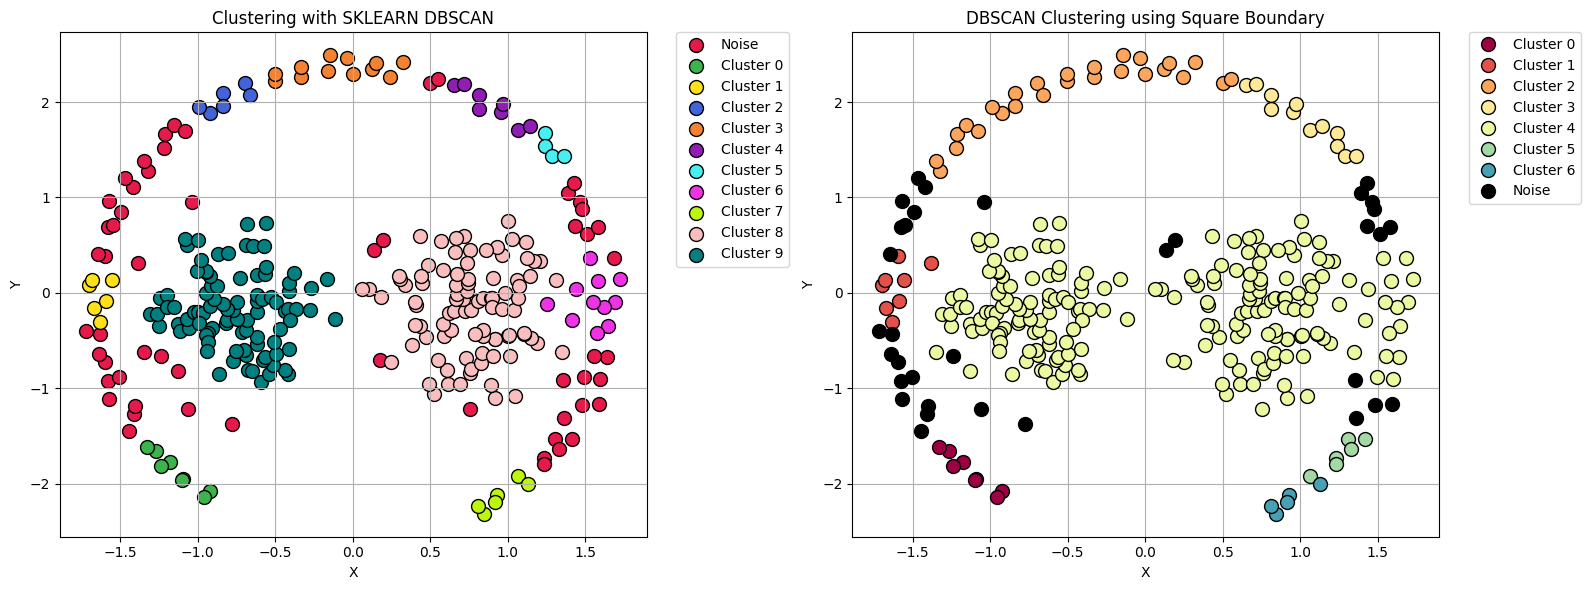

In [35]:
#Data:
arff_file = arff.loadarff('pathbased.arff')
df = pd.DataFrame(arff_file[0])
X = df.loc[:, ["x", "y"]]
X.head()
X = X.to_numpy()
# Normalize -- Standardization
scaler = StandardScaler()
X = scaler.fit_transform(X)

#Sklearn - Original DBSCAN
start_time = time.time()
origDbscan = DBSCAN(eps=0.25, min_samples=6)
labels = origDbscan.fit_predict(X)
end_time = time.time()
print("------------------------")
print("Original DBSCAN")
print(f"Time taken to run Original DBSCAN: {end_time - start_time:.4f} seconds")
printClusterInformation(labels)

print()
# Boundary DBSCAN
x_range = (-0.25, 0.25)  # Horizontal boundary range (xmin, xmax)
y_range = (-0.25, 0.25)  # Vertical boundary range (ymin, ymax)
min_pts = 6
start_time = time.time()
cluster_labels = dbscan(X, x_range, y_range, min_pts)
end_time = time.time()
print("------------------------")
print("Boundary Neighbourhood DBSCAN")
print(f"Time taken to run Boundary DBSCAN: {end_time - start_time:.4f} seconds")
printClusterInformation(cluster_labels)

plotClusters(X, labels, cluster_labels)


Clustering Benchmark Data used from: Dataset:
https://github.com/deric/clustering-benchmark/tree/master

DBSCAN Implementation (PSEUDOCODE):
https://en.wikipedia.org/wiki/DBSCAN